# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
# Parse the website
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [6]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
#Find the header
headers = table.find_all("th")

#Create a list
headers_list = []
for header in headers:
    title = header.text
    headers_list.append(title)

headers_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
df=pd.DataFrame(columns=headers_list)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [9]:
#Find the data in the rows and add it to the dataframe 
for row in table.find_all('tr', class_ ="data-row"): 
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(df)
    df.loc[length] = row_data


In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.info()

#Alternative way to check for data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)


In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_month = df['month'].nunique()

print(f'There are {mars_month} months on Mars')

There are 12 months on Mars


In [16]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].nunique()
print(f'There are {martian_days} Martian days worth of data')

There are 1867 Martian days worth of data


In [17]:
#Create an empty list to store the average min temperature for each month 

avg_min_temp = []

for i in range (1, mars_month+1):
    #Create a dictionary to hold the month colun and the average min. temp 
    weather_month = {"month": "", "avg_min_temp":""}
    #Locate the month and temp. in the Dataframe, and determine the average min. temp for each month. 
    avg_mtemp_month = df.loc[df["month"]==i]["min_temp"].mean()
    weather_month["month"] = i
    weather_month["avg_min_temp"] = avg_mtemp_month 
    #Create a list of the months and average_min_temp 
    avg_min_temp.append(weather_month)

print(avg_min_temp)

[{'month': 1, 'avg_min_temp': -77.16091954022988}, {'month': 2, 'avg_min_temp': -79.93258426966293}, {'month': 3, 'avg_min_temp': -83.30729166666667}, {'month': 4, 'avg_min_temp': -82.74742268041237}, {'month': 5, 'avg_min_temp': -79.30872483221476}, {'month': 6, 'avg_min_temp': -75.29931972789116}, {'month': 7, 'avg_min_temp': -72.28169014084507}, {'month': 8, 'avg_min_temp': -68.38297872340425}, {'month': 9, 'avg_min_temp': -69.17164179104478}, {'month': 10, 'avg_min_temp': -71.98214285714286}, {'month': 11, 'avg_min_temp': -71.98550724637681}, {'month': 12, 'avg_min_temp': -74.45180722891567}]


In [36]:
#Create a pandas Dataframe for the average min temp for each month 
temp_df = pd.DataFrame(avg_min_temp)
temp_df

,month,avg_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

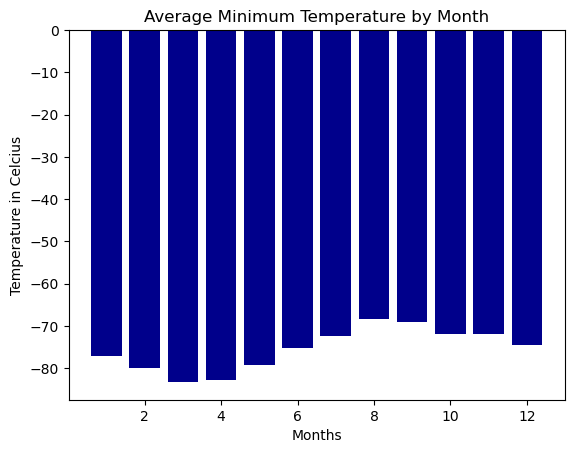

In [19]:
# Plot the average temperature by month
plt.bar(temp_df['month'], temp_df['avg_min_temp'], color = 'darkblue')

#Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Temperature in Celcius")

# Create title 
plt.title('Average Minimum Temperature by Month')


In [20]:
# Identify the coldest months in Curiosity's location
coldest_temp = temp_df['avg_min_temp'].min()
coldest_month =temp_df.loc[temp_df['avg_min_temp']==coldest_temp]

coldest_month


,month,avg_min_temp
2,3,-83.307292


In [21]:
# Identify the hottest months in Curiosity's location
hottest_temp= temp_df['avg_min_temp'].max()
hottest_month =temp_df.loc[temp_df['avg_min_temp']==hottest_temp]

hottest_month

,month,avg_min_temp
7,8,-68.382979


## Analysis:
Coldest month: 3, with an average min temp of -83.307292
Hottest month: 8, with an average min temp of -67.670213

In [22]:
# 4. Average pressure by Martian month
#Create an empty list to store the average pressure for each month 

avg_pressure = []

for i in range (1, mars_month+1):
    #Create a dictionary to hold the month column and the average min. temp 
    pressure_month = {"month": "", "average_pressure":""}
    #Locate the month and pressure in the Dataframe, and determine the average pressure for each month. 
    avg_pressure_month = df.loc[df["month"]==i]["pressure"].mean()
    pressure_month["month"] = i
    pressure_month["average_pressure"] = avg_pressure_month
    #Create a list of the months and avg_pressure_month
    avg_pressure.append(pressure_month)

#Create a dataframe of the average pressure with each month 
pressure_df = pd.DataFrame(avg_pressure)
pressure_df

,month,average_pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0.5, 1.0, 'Average Atmospheric Pressure by Month')

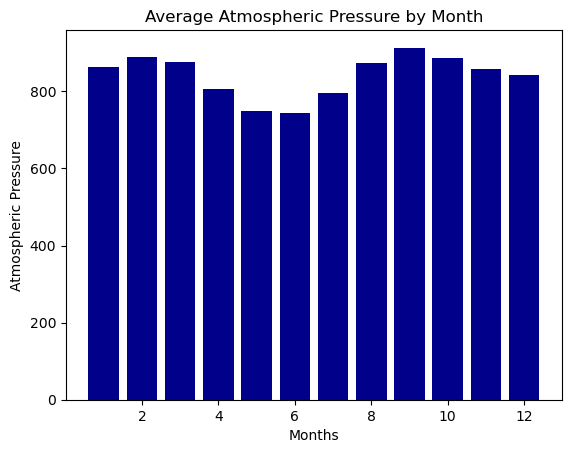

In [23]:
# Plot the average pressure by month
plt.bar(pressure_df['month'], pressure_df['average_pressure'], color = 'darkblue')

#Create labels for the x and y axis
plt.xlabel("Months")
plt.ylabel("Atmospheric Pressure")

# Create title 
plt.title('Average Atmospheric Pressure by Month')

In [24]:
# Identify the lowest atospheric pressure, and highest in Curiosity's location
#Lowest pressure
lowest_pressure = pressure_df['average_pressure'].min()
lowest_month =pressure_df.loc[pressure_df['average_pressure']==lowest_pressure ]

lowest_month


,month,average_pressure
5,6,745.054422


In [25]:
#Highest pressure
highest_pressure = pressure_df['average_pressure'].max()
highest_month =pressure_df.loc[pressure_df['average_pressure']==highest_pressure]

highest_month

,month,average_pressure
8,9,913.30597


## Analysis:
Lowest pressure: 6, with an average atmospheric pressure of 745.882353
Highest pressure: 9 , with an average atmospheric pressure of 914.914773

## 5. How many terrestrial (earth) days are there in a Martian year?

In [26]:
#Determine the original Sun's longitude
sun_long=df['ls'].loc[0]
sun_long

155

In [27]:
#Assuming that the Sun's longitude will be the same after approximately 1 Martial year
# Find the next rows where longitude is equal the sun_long
same_long=df.loc[df['ls']==sun_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [28]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

pd.Timestamp("2012-08-16")-pd.Timestamp("2014-07-04")

Timedelta('-687 days +00:00:00')

In [29]:
pd.Timestamp("2016-05-21")-pd.Timestamp("2014-07-04")

Timedelta('687 days 00:00:00')

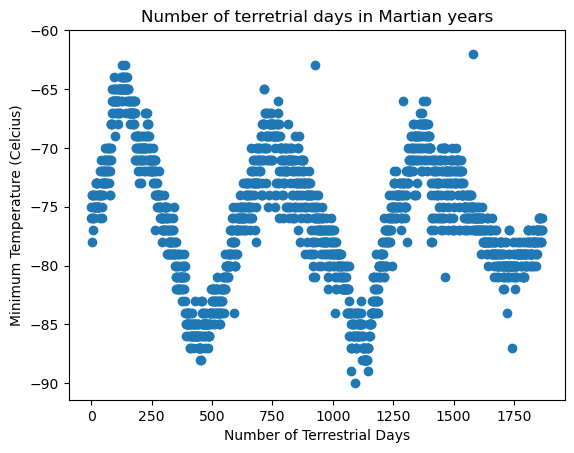

By finding the distance between one valley on the graph (450) to the next (1125),there are likely around 675 terrestrial days in a Martian year.


In [34]:
# 5. Plot a graph to determine the number of terretrial days in Martian years
plt.figure(facecolor='white')
plt.scatter(x=df.index, y=df['min_temp'])
plt.ylim(top= -60)
plt.ylabel('Minimum Temperature (Celcius)')
plt.xlabel('Number of Terrestrial Days')
# Create title 
plt.title('Number of terretrial days in Martian years')
plt.show()
print('By finding the distance between one valley on the graph (450) to the next (1125),\
there are likely around 675 terrestrial days in a Martian year.')

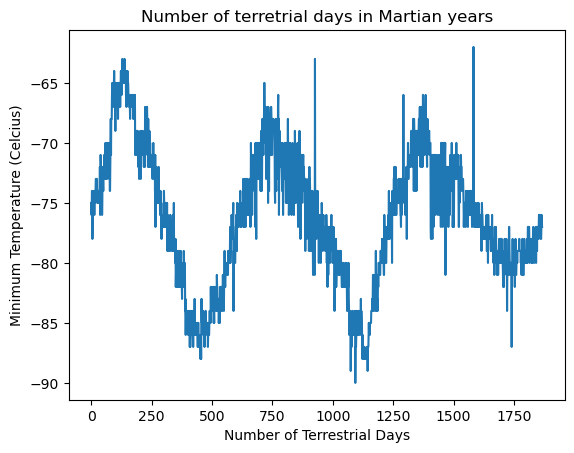

In [35]:
#Alternative method of plotting number of terretrial days 
df['min_temp'].plot()
# Add x-axis and y-axis labels, and title 
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (Celcius)')
plt.title('Number of terretrial days in Martian years')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv('Mars_weather_data.csv')


In [33]:
browser.quit()